# Credit Risk Modeling - Data Preprocessing

In [168]:
import numpy as np
import pandas as pd

In [169]:
data = pd.read_csv("loan_data.csv")

C:\Users\tprofetto\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [170]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
data.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [172]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [173]:
# Removing Strings from 'Employment Length' variable
data["emp_length_int"] = data["emp_length"].str.replace('\+ years', '')
data["emp_length_int"] = data["emp_length_int"].str.replace('< 1 year', str(0))
data["emp_length_int"] = data["emp_length_int"].str.replace('n/a', str(0))
data["emp_length_int"] = data["emp_length_int"].str.replace(' years', '')
data["emp_length_int"] = data["emp_length_int"].str.replace(' year', '')

data["emp_length_int"] = pd.to_numeric(data["emp_length_int"])

C:\Users\tprofetto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [174]:
# Preprocessing 'term' variable

data['term_int'] = data['term'].str.replace(' months', '')
data['term_int'] = data['term_int'].str.replace(' ', ' ')

In [175]:
# Changing credit line dates from days to months

data["earliest_cr_line_date"] = pd.to_datetime(data["earliest_cr_line"], format='%b-%y')

data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
data['mths_since_earliest_cr_line'][data['mths_since_earliest_cr_line'] < 0] = data['mths_since_earliest_cr_line'].max()

C:\Users\tprofetto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [176]:
# Converting issue date variable from days to months

data['issue_d_date'] = pd.to_datetime(data['issue_d'], format = '%b-%y')
data['mths_since_issue_d_date'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['issue_d_date']) / np.timedelta64(1, 'M')))

In [177]:
# Transforming categorical variables to numeric type

data_dummies = [
    pd.get_dummies(data["grade"], prefix='grade', prefix_sep=':'),
    pd.get_dummies(data["sub_grade"], prefix='sub_grade', prefix_sep=':'),
    pd.get_dummies(data["home_ownership"], prefix='home_ownership', prefix_sep=':'),
    pd.get_dummies(data["verification_status"], prefix='verification_status', prefix_sep=':'),
    pd.get_dummies(data["loan_status"], prefix='loan_status', prefix_sep=':'),
    pd.get_dummies(data["purpose"], prefix='purpose', prefix_sep=':'),
    pd.get_dummies(data["addr_state"], prefix='addr_state', prefix_sep=':'),
    pd.get_dummies(data["initial_list_status"], prefix='initial_list_status', prefix_sep=':')
]

data_dummies = pd.concat(data_dummies, axis=1)
data = pd.concat([data, data_dummies], axis=1)


### Handling Missing Values

In [178]:
# Checking for missing values in entire dataset
data.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                        ..
addr_state:WI            0
addr_state:WV            0
addr_state:WY            0
initial_list_status:f    0
initial_list_status:w    0
Length: 207, dtype: int64

In [179]:
# Replacing total revenue by funded amount iff there is a null value
data['total_rev_hi_lim'].fillna(data['funded_amnt'], inplace=True)

# Replacing missing values for annual income by the mean of the variable
data['annual_inc'].fillna(data['annual_inc'].mean())

# Replacing the missing values for the following variables with zeros
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace = True)

In [180]:
data['loan_status'].value_counts() / data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [181]:
# Defining our target variable (value to be predicted)

data['good_bad'] = np.where(data['loan_status'].isin(['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)']), 0, 1)

data['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int32

In [182]:
# Storing independent and dependent vairables in x, y respectively
X = data.drop('good_bad', axis=1)
y = data['good_bad']

### Calculating the Weight of Evidence (WoE) for Categorical variables

In [183]:
# Function for returning a datframe with WoE, IV metrics
def WoE(inputs, variable_name, target):
    df = pd.concat([inputs[variable_name], target], axis=1)
    df = pd.concat(
        [
        df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
        df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()
        ], axis=1)
    
    df = df.iloc[:, [0, 1, 3]]
    
    df.columns = [df.columns.values[0], 'total', 'prop_good']
    df['%_total'] = df['total'] / df['total'].sum()
    
    df['good'] = df['prop_good'] * df['total']
    df['bad'] = (1 - df['prop_good']) * df['total']
    
    df['%_good'] = df['good'] / df['good'].sum()
    df['%_bad'] = df['bad'] / df['bad'].sum()
    
    df['WoE'] = np.log(df['%_good'] / df['%_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop=True)
    
    df['diff_%good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    
    df['IV'] = ( (df['%_good'] - df['%_bad']) * df['WoE'] ).sum()
    
    
    return df

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function for plotting WoE against specific variables
def plot_WoE(df):
    
    x = np.array(df.iloc[:, 0].apply(str))
    y = df['WoE']
    
    plt.figure(figsize=(16,8))
    plt.plot(x, y, marker='o', linestyle='--', color='k')
    
    plt.xlabel(df.columns[0])
    plt.ylabel('Weight of Evidence (WoE)')

## Preprocessing Categorical Variables
### Home Ownership

In [185]:
home = WoE(X, 'home_ownership', y)
home

,home_ownership,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,OTHER,182,0.791209,0.000390,144.0,38.0,0.000347,0.000746,-0.765617,NaN,NaN,inf
1,NONE,50,0.840000,0.000107,42.0,8.0,0.000101,0.000157,-0.439616,0.048791,0.326001,inf
2,RENT,188473,0.873897,0.404201,164706.0,23767.0,0.396579,0.466312,-0.161980,0.033897,0.277636,inf
3,OWN,41704,0.891737,0.089439,37189.0,4515.0,0.089544,0.088585,0.010764,0.017840,0.172744,inf
4,MORTGAGE,235875,0.904017,0.505860,213235.0,22640.0,0.513427,0.444200,0.144832,0.012280,0.134069,inf
5,ANY,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.095983,inf,inf


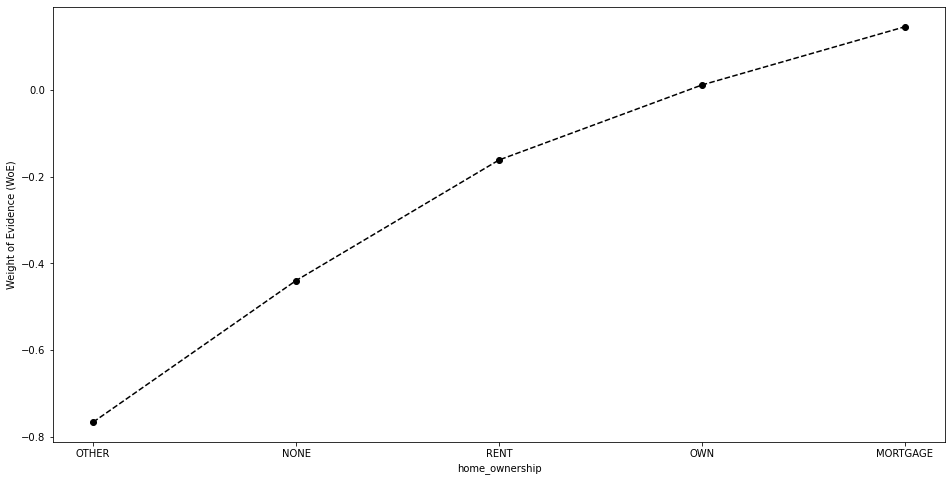

In [186]:
plot_WoE(home)

In [187]:
# Dummy variable for home ownership
X['home_ownership:RENT_OTHER_NONE_ANY'] = sum([X['home_ownership:RENT'], X['home_ownership:OTHER'], X['home_ownership:NONE'], X['home_ownership:ANY']])

### Address (State)

In [188]:
state = WoE(X, 'addr_state', y)
state

,addr_state,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,NE,14,0.428571,0.000030,6.0,8.0,0.000014,0.000157,-2.385526,NaN,NaN,inf
1,IA,14,0.785714,0.000030,11.0,3.0,0.000026,0.000059,-0.798561,3.571429e-01,1.586965,inf
2,NV,6519,0.862862,0.013981,5625.0,894.0,0.013544,0.017540,-0.258574,7.714812e-02,0.539987,inf
3,HI,2487,0.873743,0.005334,2173.0,314.0,0.005232,0.006161,-0.163373,1.088106e-02,0.095201,inf
4,FL,31637,0.874640,0.067849,27671.0,3966.0,0.066626,0.077814,-0.155217,8.969866e-04,0.008156,inf
5,AL,5853,0.876474,0.012552,5130.0,723.0,0.012352,0.014185,-0.138392,1.833151e-03,0.016825,inf
6,NY,40242,0.883182,0.086303,35541.0,4701.0,0.085576,0.092234,-0.074932,6.708147e-03,0.063460,inf
7,LA,5489,0.883403,0.011772,4849.0,640.0,0.011675,0.012557,-0.072784,2.214196e-04,0.002148,inf
8,NM,2588,0.884467,0.005550,2289.0,299.0,0.005511,0.005866,-0.062417,1.063600e-03,0.010367,inf
9,OK,4117,0.884625,0.008829,3642.0,475.0,0.008769,0.009320,-0.060871,1.579570e-04,0.001547,inf


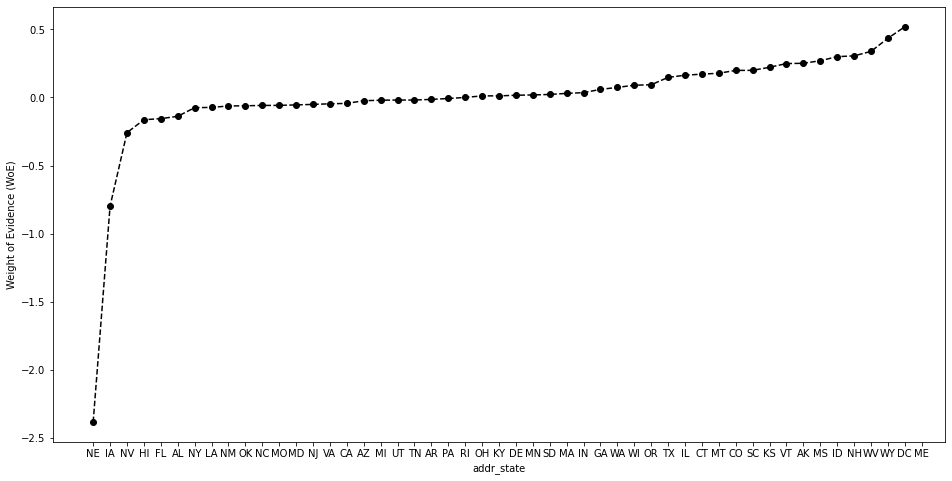

In [189]:
plot_WoE(state)

In [190]:
#set all values of the state ND to 0 if there is no such column, else pass
if ['addr_state:ND'] in X.columns.values:
    pass
else:
    X['addr_state:ND'] = 0

In [191]:
# Creating dummy variables for the states
X['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([X['addr_state:ND'], X['addr_state:NE'], X['addr_state:IA'], X['addr_state:NV'], X['addr_state:FL'], X['addr_state:HI'], X['addr_state:AL']])


X['addr_state:NM_VA'] = sum([X['addr_state:NM'], X['addr_state:VA']])


X['addr_state:OK_TN_MO_LA_MD_NC'] = sum([X['addr_state:OK'], X['addr_state:TN'], X['addr_state:MO'], X['addr_state:LA'], X['addr_state:MD'], X['addr_state:NC']])


X['addr_state:UT_KY_AZ_NJ'] = sum([X['addr_state:UT'], X['addr_state:KY'], X['addr_state:AZ'], X['addr_state:NJ']])


X['addr_state:AR_MI_PA_OH_MN'] = sum([X['addr_state:AR'], X['addr_state:MI'],X['addr_state:PA'], X['addr_state:OH'], X['addr_state:MN']])


X['addr_state:RI_MA_DE_SD_IN'] = sum([X['addr_state:RI'], X['addr_state:MA'],X['addr_state:DE'], X['addr_state:SD'], X['addr_state:IN']])


X['addr_state:GA_WA_OR'] = sum([X['addr_state:GA'], X['addr_state:WA'], X['addr_state:OR']])


X['addr_state:WI_MT'] = sum([X['addr_state:WI'], X['addr_state:MT']])


X['addr_state:IL_CT'] = sum([X['addr_state:IL'], X['addr_state:CT']])


X['addr_state:KS_SC_CO_VT_AK_MS'] = sum([X['addr_state:KS'], X['addr_state:SC'], X['addr_state:CO'], X['addr_state:VT'], X['addr_state:AK'], X['addr_state:MS']])


X['addr_state:WV_NH_WY_DC_ME_ID'] = sum([X['addr_state:WV'], X['addr_state:NH'], X['addr_state:WY'], X['addr_state:DC'], X['addr_state:ME'], X['addr_state:ID']])

### Verification Status

In [192]:
verif = WoE(X, 'verification_status', y)
verif

,verification_status,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,Verified,168055,0.872631,0.360413,146650.0,21405.0,0.353104,0.419969,-0.173420,NaN,NaN,0.020831
1,Source Verified,149993,0.895882,0.321677,134376.0,15617.0,0.323550,0.306408,0.054438,0.023251,0.227858,0.020831
2,Not Verified,148237,0.905921,0.317911,134291.0,13946.0,0.323346,0.273623,0.166972,0.010039,0.112535,0.020831


### Purpose

In [193]:
purpose = WoE(X, 'purpose', y)
purpose

,purpose,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,small_business,7013,0.784258,0.015040,5500.0,1513.0,0.013243,0.029685,-0.807190,NaN,NaN,0.03698
1,educational,422,0.791469,0.000905,334.0,88.0,0.000804,0.001727,-0.764040,0.007211,0.043151,0.03698
2,renewable_energy,351,0.846154,0.000753,297.0,54.0,0.000715,0.001059,-0.393096,0.054685,0.370944,0.03698
3,moving,2994,0.847361,0.006421,2537.0,457.0,0.006109,0.008966,-0.383790,0.001208,0.009306,0.03698
4,house,2269,0.859850,0.004866,1951.0,318.0,0.004698,0.006239,-0.283798,0.012489,0.099992,0.03698
5,other,23690,0.862009,0.050806,20421.0,3269.0,0.049170,0.064138,-0.265764,0.002159,0.018034,0.03698
6,medical,4602,0.866145,0.009870,3986.0,616.0,0.009597,0.012086,-0.230548,0.004136,0.035217,0.03698
7,wedding,2343,0.878361,0.005025,2058.0,285.0,0.004955,0.005592,-0.120843,0.012216,0.109704,0.03698
8,vacation,2487,0.882187,0.005334,2194.0,293.0,0.005283,0.005749,-0.084535,0.003826,0.036308,0.03698
9,debt_consolidation,274195,0.886690,0.588042,243126.0,31069.0,0.585399,0.609579,-0.040475,0.004503,0.044060,0.03698


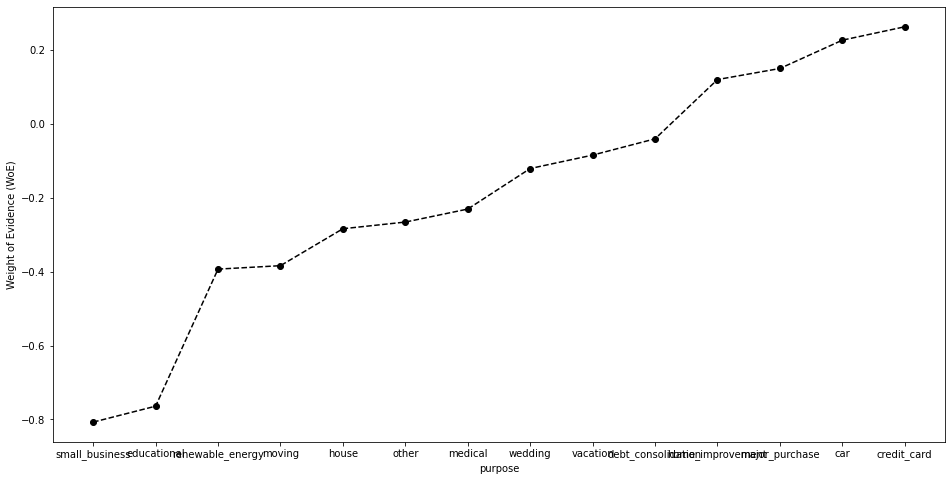

In [194]:
plot_WoE(purpose)

In [195]:
# Creating dummy variables for 'purpose'
X['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([X['purpose:educational'], X['purpose:small_business'], X['purpose:wedding'], X['purpose:renewable_energy'], X['purpose:moving'], X['purpose:house']])

X['purpose:oth__med__vacation'] = sum([X['purpose:other'], X['purpose:medical'], X['purpose:vacation']])

X['purpose:major_purch__car__home_impr'] = sum([X['purpose:major_purchase'], X['purpose:car'], X['purpose:home_improvement']])

### Initial List Status

In [196]:
initial_status = WoE(X, 'initial_list_status', y)
initial_status

,initial_list_status,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,f,303005,0.879692,0.649828,266551.0,36454.0,0.641801,0.715233,-0.108330,NaN,NaN,0.024801
1,w,163280,0.911110,0.350172,148766.0,14514.0,0.358199,0.284767,0.229417,0.031418,0.337746,0.024801


## Preprocessing Quantitative Variables
### WoE for Quantitative variables

In [197]:
# Function for returning a datframe with WoE, IV metrics
def q_WoE(inputs, variable_name, target):
    df = pd.concat([inputs[variable_name], target], axis=1)
    df = pd.concat(
        [
        df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
        df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()
        ], axis=1)
    
    df = df.iloc[:, [0, 1, 3]]
    
    df.columns = [df.columns.values[0], 'total', 'prop_good']
    df['%_total'] = df['total'] / df['total'].sum()
    
    df['good'] = df['prop_good'] * df['total']
    df['bad'] = (1 - df['prop_good']) * df['total']
    
    df['%_good'] = df['good'] / df['good'].sum()
    df['%_bad'] = df['bad'] / df['bad'].sum()
    
    df['WoE'] = np.log(df['%_good'] / df['%_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop=True)
    
    df['diff_%good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    
    df['IV'] = ( (df['%_good'] - df['%_bad']) * df['WoE'] ).sum()
    
    
    return df

### Term

In [198]:
term = q_WoE(X, 'term_int', y)
term

,term_int,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,60,128332,0.858508,0.275222,110174.0,18158.0,0.265277,0.356263,-0.294894,NaN,NaN,0.03886
1,36,337953,0.902915,0.724778,305143.0,32810.0,0.734723,0.643737,0.132203,0.044408,0.427097,0.03886


In [199]:
X['term:36'] = np.where((X['term_int'] == 36), 1, 0)
X['term:60'] = np.where((X['term_int'] == 60), 1, 0)

### Employment Length

In [200]:
emp = q_WoE(X, 'emp_length_int', y)
emp

,emp_length_int,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,0.0,57273,0.876015,0.122828,50172.0,7101.0,0.120804,0.139323,-0.142623,NaN,NaN,0.006611
1,6.0,26112,0.882889,0.056000,23054.0,3058.0,0.055509,0.059998,-0.077766,0.006874,0.064857,0.006611
2,5.0,30774,0.885033,0.065998,27236.0,3538.0,0.065579,0.069416,-0.056866,0.002144,0.020900,0.006611
3,9.0,17888,0.887914,0.038363,15883.0,2005.0,0.038243,0.039338,-0.028239,0.002881,0.028627,0.006611
4,1.0,29622,0.888124,0.063528,26308.0,3314.0,0.063344,0.065021,-0.026127,0.000210,0.002112,0.006611
5,7.0,26180,0.888655,0.056146,23265.0,2915.0,0.056017,0.057193,-0.020764,0.000532,0.005363,0.006611
6,8.0,22395,0.889931,0.048029,19930.0,2465.0,0.047987,0.048364,-0.007810,0.001275,0.012954,0.006611
7,2.0,41373,0.890242,0.088729,36832.0,4541.0,0.088684,0.089095,-0.004624,0.000312,0.003185,0.006611
8,4.0,28023,0.890411,0.060098,24952.0,3071.0,0.060079,0.060253,-0.002893,0.000169,0.001731,0.006611
9,3.0,36596,0.890480,0.078484,32588.0,4008.0,0.078465,0.078638,-0.002192,0.000068,0.000701,0.006611


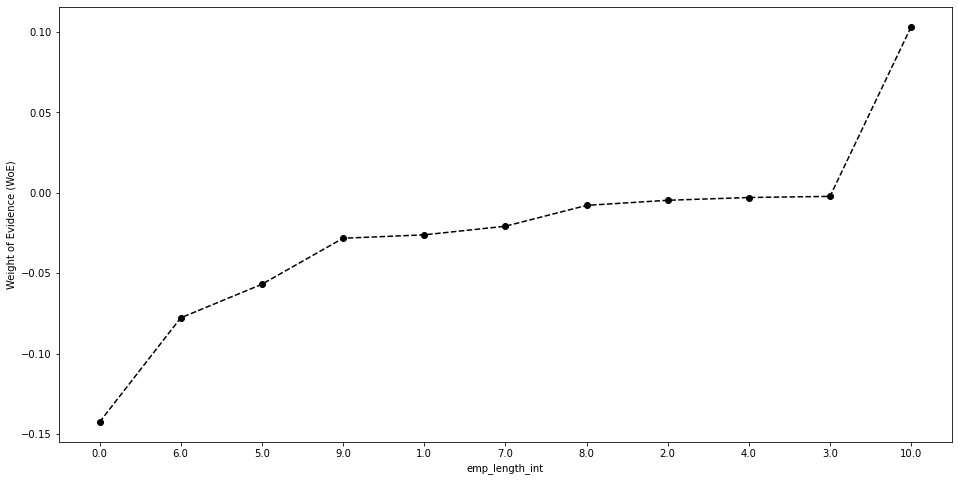

In [201]:
plot_WoE(emp)

In [202]:
X['emp_length:0'] = np.where(X['emp_length_int'].isin([0]), 1, 0)
X['emp_length:1'] = np.where(X['emp_length_int'].isin([1]), 1, 0)
X['emp_length:2-4'] = np.where(X['emp_length_int'].isin(range(2,5)), 1, 0)
X['emp_length:5-6'] = np.where(X['emp_length_int'].isin(range(5,7)), 1, 0)
X['emp_length:7-9'] = np.where(X['emp_length_int'].isin(range(7,10)), 1, 0)
X['emp_length:10'] = np.where(X['emp_length_int'].isin([10]), 1, 0)

### Interest Rate

In [203]:
X['int_rate_factor'] = pd.cut(X['int_rate'], 50)

interest = q_WoE(X, 'int_rate_factor', y)
interest

,int_rate_factor,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,"(23.583, 23.996]",1981,0.729430,0.004248,1445.0,536.0,0.003479,0.010516,-1.106114,NaN,NaN,0.347385
1,"(25.234, 25.647]",972,0.740741,0.002085,720.0,252.0,0.001734,0.004944,-1.048022,0.011311,0.058092,0.347385
2,"(25.647, 26.06]",2260,0.751327,0.004847,1698.0,562.0,0.004088,0.011027,-0.992140,0.010587,0.055882,0.347385
3,"(22.758, 23.17]",1910,0.756021,0.004096,1444.0,466.0,0.003477,0.009143,-0.966857,0.004694,0.025282,0.347385
4,"(22.345, 22.758]",2837,0.758195,0.006084,2151.0,686.0,0.005179,0.013459,-0.955034,0.002174,0.011824,0.347385
5,"(24.409, 24.822]",2100,0.767619,0.004504,1612.0,488.0,0.003881,0.009575,-0.902929,0.009424,0.052105,0.347385
6,"(21.519, 21.932]",1211,0.767960,0.002597,930.0,281.0,0.002239,0.005513,-0.901014,0.000341,0.001914,0.347385
7,"(21.106, 21.519]",3430,0.775219,0.007356,2659.0,771.0,0.006402,0.015127,-0.859827,0.007258,0.041187,0.347385
8,"(24.822, 25.234]",1666,0.775510,0.003573,1292.0,374.0,0.003111,0.007338,-0.858153,0.000292,0.001674,0.347385
9,"(23.996, 24.409]",1848,0.781926,0.003963,1445.0,403.0,0.003479,0.007907,-0.820916,0.006416,0.037237,0.347385


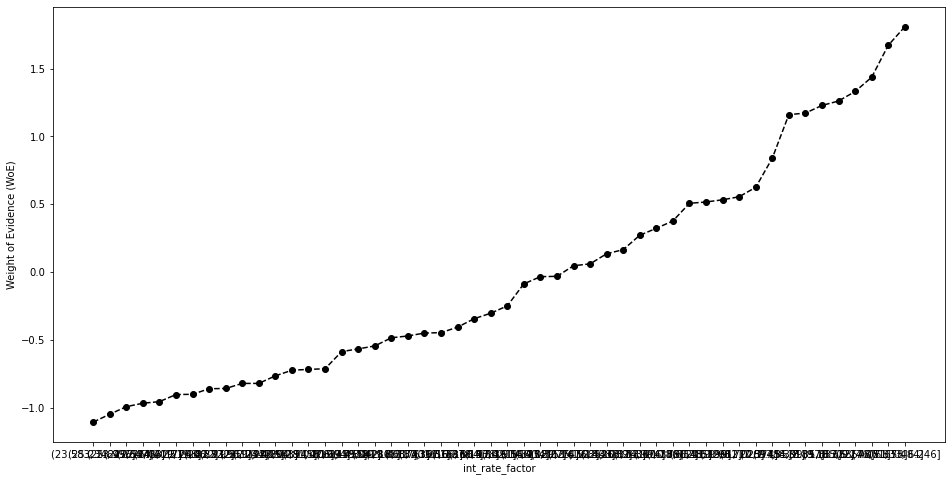

In [204]:
plot_WoE(interest)

In [205]:
# Converting Interest Rates to dummy variables
X['int_rate:<9.548'] = np.where((X['int_rate'] <= 9.548), 1, 0)
X['int_rate:9.548-12.025'] = np.where((X['int_rate'] > 9.548) & (X['int_rate'] <= 12.025), 1, 0)
X['int_rate:12.025-15.74'] = np.where((X['int_rate'] > 12.025) & (X['int_rate'] <= 15.74), 1, 0)
X['int_rate:15.74-20.281'] = np.where((X['int_rate'] > 15.74) & (X['int_rate'] <= 20.281), 1, 0)
X['int_rate:>20.281'] = np.where((X['int_rate'] > 20.281), 1, 0)

### Funded Amount

In [206]:
X['funded_amnt_factor'] = pd.cut(X['funded_amnt'], 50)

funded = q_WoE(X, 'funded_amnt_factor', y)
funded

,funded_amnt_factor,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,"(30170.0, 30860.0]",700,0.825714,0.001501,578.0,122.0,0.001392,0.002394,-0.542291,NaN,NaN,0.014153
1,"(26030.0, 26720.0]",1551,0.833011,0.003326,1292.0,259.0,0.003111,0.005082,-0.490725,0.007297,0.051566,0.014153
2,"(23270.0, 23960.0]",2322,0.843239,0.004980,1958.0,364.0,0.004714,0.007142,-0.415319,0.010228,0.075406,0.014153
3,"(21200.0, 21890.0]",2557,0.848260,0.005484,2169.0,388.0,0.005223,0.007613,-0.376828,0.005021,0.038491,0.014153
4,"(28100.0, 28790.0]",999,0.854855,0.002142,854.0,145.0,0.002056,0.002845,-0.324647,0.006595,0.052181,0.014153
5,"(19130.0, 19820.0]",5061,0.861095,0.010854,4358.0,703.0,0.010493,0.013793,-0.273432,0.006240,0.051214,0.014153
6,"(28790.0, 29480.0]",1462,0.862517,0.003135,1261.0,201.0,0.003036,0.003944,-0.261489,0.001422,0.011944,0.014153
7,"(17060.0, 17750.0]",4343,0.863228,0.009314,3749.0,594.0,0.009027,0.011654,-0.255479,0.000711,0.006010,0.014153
8,"(25340.0, 26030.0]",2319,0.865028,0.004973,2006.0,313.0,0.004830,0.006141,-0.240149,0.001800,0.015330,0.014153
9,"(18440.0, 19130.0]",4908,0.866952,0.010526,4255.0,653.0,0.010245,0.012812,-0.223571,0.001924,0.016578,0.014153


### Months since Issue Date

In [207]:
X['mths_since_issue_d_date_factor'] = pd.cut(X['mths_since_issue_d_date'], 50)

months = q_WoE(X, 'mths_since_issue_d_date_factor', y)
months

,mths_since_issue_d_date_factor,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,"(120.6, 122.4]",217,0.686636,0.000465,149.0,68.0,0.000359,0.001334,-1.313405,NaN,NaN,0.114799
1,"(118.8, 120.6]",477,0.725367,0.001023,346.0,131.0,0.000833,0.002570,-1.126603,0.038731,0.186803,0.114799
2,"(122.4, 124.2]",127,0.740157,0.000272,94.0,33.0,0.000226,0.000647,-1.051057,0.014791,0.075546,0.114799
3,"(115.2, 117.0]",661,0.770045,0.001418,509.0,152.0,0.001226,0.002982,-0.889277,0.029888,0.161780,0.114799
4,"(117.0, 118.8]",306,0.800654,0.000656,245.0,61.0,0.000590,0.001197,-0.707460,0.030608,0.181817,0.114799
5,"(113.4, 115.2]",239,0.803347,0.000513,192.0,47.0,0.000462,0.000922,-0.690496,0.002694,0.016963,0.114799
6,"(108.0, 109.8]",209,0.813397,0.000448,170.0,39.0,0.000409,0.000765,-0.625607,0.010050,0.064889,0.114799
7,"(64.8, 66.6]",8444,0.823188,0.018109,6951.0,1493.0,0.016737,0.029293,-0.559746,0.009791,0.065861,0.114799
8,"(70.2, 72.0]",4869,0.825221,0.010442,4018.0,851.0,0.009675,0.016697,-0.545717,0.002033,0.014029,0.114799
9,"(111.6, 113.4]",241,0.825726,0.000517,199.0,42.0,0.000479,0.000824,-0.542209,0.000505,0.003508,0.114799


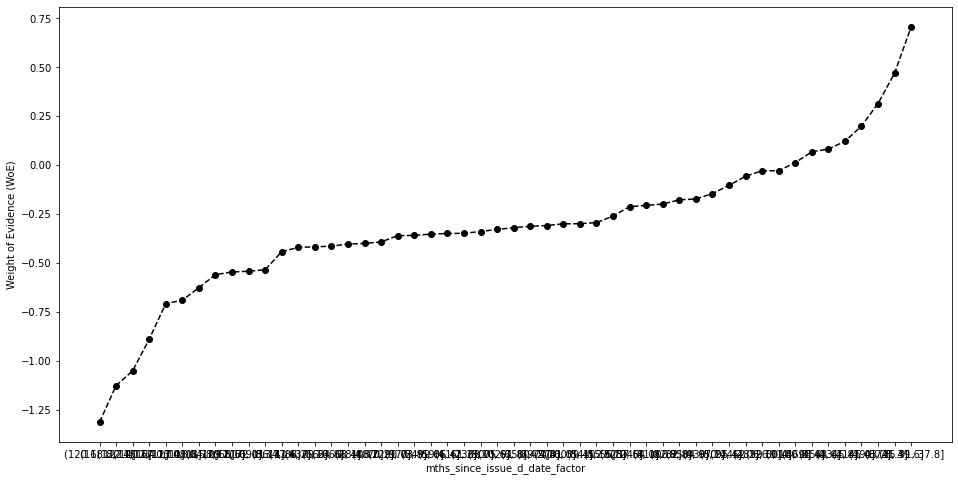

In [208]:
plot_WoE(months)

In [209]:
X['mths_since_issue_d:<38'] = np.where(X['mths_since_issue_d_date_factor'].isin(range(38)), 1, 0)
X['mths_since_issue_d:38-39'] = np.where(X['mths_since_issue_d_date_factor'].isin(range(38,40)), 1, 0)
X['mths_since_issue_d:40-41'] = np.where(X['mths_since_issue_d_date_factor'].isin(range(40,42)), 1, 0)
X['mths_since_issue_d:42-48'] = np.where(X['mths_since_issue_d_date_factor'].isin(range(42,49)), 1, 0)
X['mths_since_issue_d:49-52'] = np.where(X['mths_since_issue_d_date_factor'].isin(range(49,53)), 1, 0)
X['mths_since_issue_d:53-64'] = np.where(X['mths_since_issue_d_date_factor'].isin(range(53,65)), 1, 0)
X['mths_since_issue_d:65-84'] = np.where(X['mths_since_issue_d_date_factor'].isin(range(65,85)), 1, 0)
X['mths_since_issue_d:>84'] = np.where(X['mths_since_issue_d_date_factor'].isin(range(85, int(X['mths_since_issue_d_date'].max()))), 1, 0)

### Installment

In [210]:
X['installment_factor'] = pd.cut(X['installment'], 50)

installment = q_WoE(X, 'installment_factor', y)
installment

,installment_factor,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,"(1354.217, 1382.104]",51,0.686275,0.000109,35.0,16.0,0.000084,0.000314,-1.315085,NaN,NaN,0.013297
1,"(1326.331, 1354.217]",147,0.761905,0.000315,112.0,35.0,0.000270,0.000687,-0.934693,0.075630,0.380391,0.013297
2,"(1298.444, 1326.331]",236,0.762712,0.000506,180.0,56.0,0.000433,0.001099,-0.930239,0.000807,0.004454,0.013297
3,"(1270.558, 1298.444]",561,0.827094,0.001203,464.0,97.0,0.001117,0.001903,-0.532671,0.064383,0.397568,0.013297
4,"(963.808, 991.694]",2227,0.837000,0.004776,1864.0,363.0,0.004488,0.007122,-0.461767,0.009906,0.070904,0.013297
5,"(1382.104, 1409.99]",43,0.837209,0.000092,36.0,7.0,0.000087,0.000137,-0.460235,0.000209,0.001532,0.013297
6,"(991.694, 1019.58]",2056,0.857004,0.004409,1762.0,294.0,0.004243,0.005768,-0.307219,0.019795,0.153016,0.013297
7,"(1242.672, 1270.558]",897,0.860647,0.001924,772.0,125.0,0.001859,0.002453,-0.277173,0.003643,0.030046,0.013297
8,"(517.625, 545.512]",13400,0.864179,0.028738,11580.0,1820.0,0.027882,0.035709,-0.247401,0.003533,0.029772,0.013297
9,"(908.035, 935.921]",2753,0.868870,0.005904,2392.0,361.0,0.005759,0.007083,-0.206837,0.004691,0.040564,0.013297


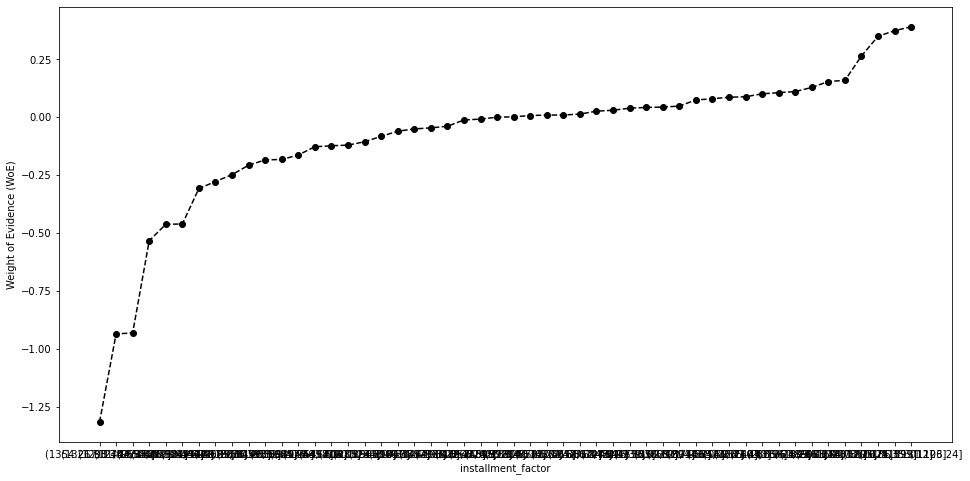

In [211]:
plot_WoE(installment)

In [212]:
X['installment_factor:<183'] = np.where(X['installment_factor'].isin(range(183)), 1, 0)
X['installment_factor:183-266'] = np.where(X['installment_factor'].isin(range(183,266)), 1, 0)
X['installment_factor:267-517'] = np.where(X['installment_factor'].isin(range(267,517)), 1, 0)
X['installment_factor:518-601'] = np.where(X['installment_factor'].isin(range(518,601)), 1, 0)
X['installment_factor:602-880'] = np.where(X['installment_factor'].isin(range(602,880)), 1, 0)
X['installment_factor:881-963'] = np.where(X['installment_factor'].isin(range(881,963)), 1, 0)
X['installment_factor:964-1075'] = np.where(X['installment_factor'].isin(range(964,1075)), 1, 0)
X['installment_factor:1076-1242'] = np.where(X['installment_factor'].isin(range(1076,1242)), 1, 0)
X['installment_factor:>1242'] = np.where(X['installment_factor'].isin(range(1242, int(X['installment'].max()))), 1, 0)

### Debt-to-Income Ratio (DTI)

In [213]:
X['dti_factor'] = pd.cut(X['dti'], 50)

dti = q_WoE(X, 'dti_factor', y)
dti

,dti_factor,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,"(31.992, 32.792]",3838,0.859562,0.008231,3299.0,539.0,0.007943,0.010575,-0.286185,NaN,NaN,0.027154
1,"(34.391, 35.191]",2313,0.862516,0.004960,1995.0,318.0,0.004804,0.006239,-0.261496,0.002954,0.024689,0.027154
2,"(30.392, 31.192]",4783,0.863266,0.010258,4129.0,654.0,0.009942,0.012832,-0.255161,0.000750,0.006335,0.027154
3,"(29.593, 30.392]",5908,0.863913,0.012670,5104.0,804.0,0.012289,0.015775,-0.249664,0.000648,0.005497,0.027154
4,"(33.592, 34.391]",3296,0.866201,0.007069,2855.0,441.0,0.006874,0.008652,-0.230062,0.002288,0.019602,0.027154
5,"(27.193, 27.993]",8380,0.866826,0.017972,7264.0,1116.0,0.017490,0.021896,-0.224664,0.000624,0.005398,0.027154
6,"(27.993, 28.793]",7936,0.866935,0.017020,6880.0,1056.0,0.016566,0.020719,-0.223714,0.000110,0.000951,0.027154
7,"(32.792, 33.592]",3529,0.867951,0.007568,3063.0,466.0,0.007375,0.009143,-0.214880,0.001016,0.008834,0.027154
8,"(26.393, 27.193]",9036,0.868526,0.019379,7848.0,1188.0,0.018896,0.023309,-0.209857,0.000575,0.005023,0.027154
9,"(28.793, 29.593]",7277,0.868765,0.015606,6322.0,955.0,0.015222,0.018737,-0.207765,0.000239,0.002092,0.027154


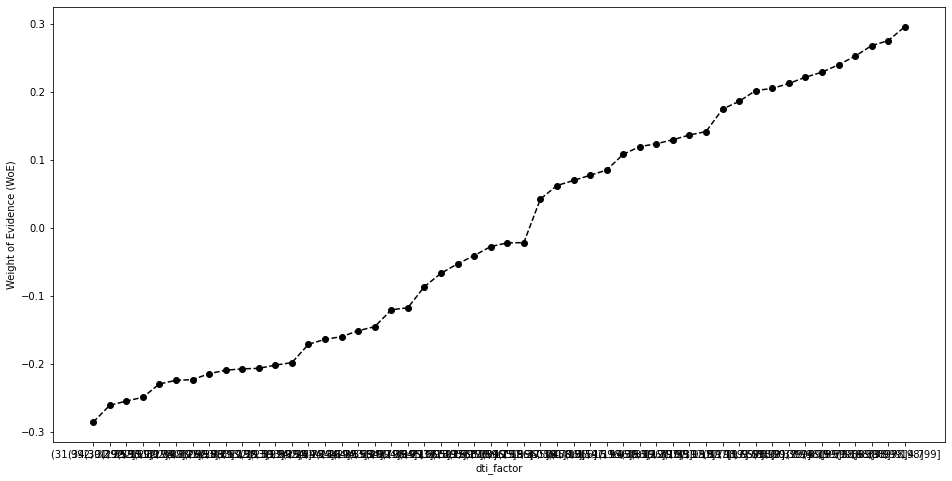

In [214]:
plot_WoE(dti)

In [215]:
X['dti:<=1.4'] = np.where(X['dti'] <= 1.4, 1, 0)
X['dti:1.4-3.5'] = np.where((X['dti'] > 1.4) & (X['dti'] <= 3.5), 1, 0)
X['dti:3.5-7.7'] = np.where((X['dti'] > 3.5) & (X['dti'] <= 7.7), 1, 0)
X['dti:7.7-10.5'] = np.where((X['dti'] > 7.7) & (X['dti'] <= 10.5), 1, 0)
X['dti:10.5-16.1'] = np.where((X['dti'] > 10.5) & (X['dti'] <= 16.1), 1, 0)
X['dti:16.1-20.3'] = np.where((X['dti'] > 16.1) & (X['dti'] <= 20.3), 1, 0)
X['dti:20.3-21.7'] = np.where((X['dti'] > 20.3) & (X['dti'] <= 21.7), 1, 0)
X['dti:21.7-22.4'] = np.where((X['dti'] > 21.7) & (X['dti'] <= 22.4), 1, 0)
X['dti:22.4-35'] = np.where((X['dti'] > 22.4) & (X['dti'] <= 35), 1, 0)
X['dti:>35'] = np.where(X['dti'] > 35, 1, 0)

### Annual Income

In [216]:
X['annual_inc_factor'] = pd.cut(X['annual_inc'], 100)
income = q_WoE(X, 'annual_inc_factor', y)
income

,annual_inc_factor,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,"(751706.4, 826687.44]",29,0.827586,0.000062,24.0,5.0,0.000058,0.000098,-0.529219,NaN,NaN,inf
1,"(1201592.64, 1276573.68]",6,0.833333,0.000013,5.0,1.0,0.000012,0.000020,-0.488397,0.005747,0.040822,inf
2,"(-5602.104, 76877.04]",306439,0.877356,0.657198,268856.0,37583.0,0.647358,0.737384,-0.130210,0.044022,0.358186,inf
3,"(601744.32, 676725.36]",55,0.890909,0.000118,49.0,6.0,0.000118,0.000118,0.002226,0.013553,0.132437,inf
4,"(76877.04, 151858.08]",139400,0.914591,0.298961,127494.0,11906.0,0.306983,0.233598,0.273192,0.023682,0.270966,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(6975132.72, 7050113.76]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
96,"(7050113.76, 7125094.8]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
97,"(7200075.84, 7275056.88]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
98,"(7275056.88, 7350037.92]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


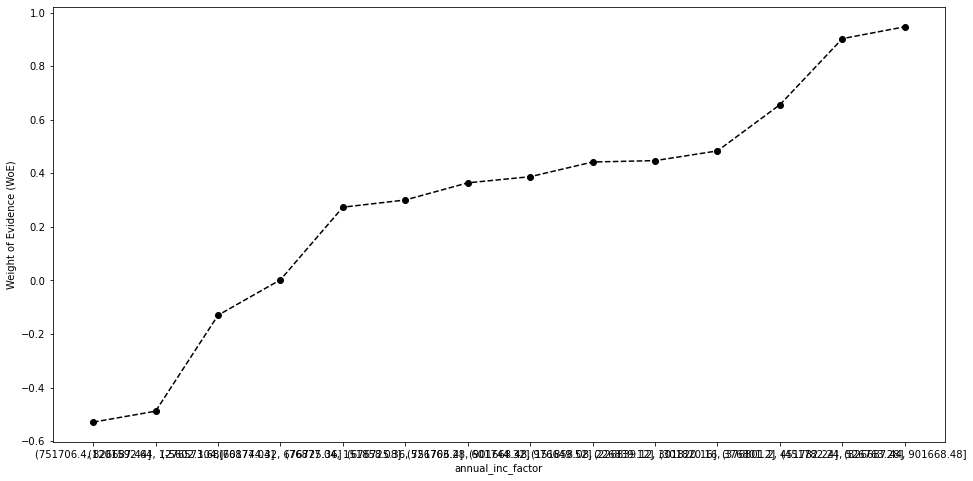

In [217]:
plot_WoE(income)

In [218]:
# Annual Income dummy variables
X['annual_inc:<20K'] = np.where((X['annual_inc'] <= 20000), 1, 0)
X['annual_inc:20K-30K'] = np.where((X['annual_inc'] > 20000) & (X['annual_inc'] <= 30000), 1, 0)
X['annual_inc:30K-40K'] = np.where((X['annual_inc'] > 30000) & (X['annual_inc'] <= 40000), 1, 0)
X['annual_inc:40K-50K'] = np.where((X['annual_inc'] > 40000) & (X['annual_inc'] <= 50000), 1, 0)
X['annual_inc:50K-60K'] = np.where((X['annual_inc'] > 50000) & (X['annual_inc'] <= 60000), 1, 0)
X['annual_inc:60K-70K'] = np.where((X['annual_inc'] > 60000) & (X['annual_inc'] <= 70000), 1, 0)
X['annual_inc:70K-80K'] = np.where((X['annual_inc'] > 70000) & (X['annual_inc'] <= 80000), 1, 0)
X['annual_inc:80K-90K'] = np.where((X['annual_inc'] > 80000) & (X['annual_inc'] <= 90000), 1, 0)
X['annual_inc:90K-100K'] = np.where((X['annual_inc'] > 90000) & (X['annual_inc'] <= 100000), 1, 0)
X['annual_inc:100K-120K'] = np.where((X['annual_inc'] > 100000) & (X['annual_inc'] <= 120000), 1, 0)
X['annual_inc:120K-140K'] = np.where((X['annual_inc'] > 120000) & (X['annual_inc'] <= 140000), 1, 0)
X['annual_inc:>140K'] = np.where((X['annual_inc'] > 140000), 1, 0)

### Months since Last Record

In [219]:
m = X[pd.notnull(X['mths_since_last_record'])]
m['mths_since_last_record_factor'] = pd.cut(X['mths_since_last_record'], 50)
last_rec = q_WoE(m, 'mths_since_last_record_factor', y[m.index])

last_rec

C:\Users\tprofetto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\tprofetto\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,mths_since_last_record_factor,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,"(126.42, 129.0]",1,0.000000,0.000016,0.0,1.0,0.000000,0.000150,-inf,NaN,NaN,inf
1,"(-0.129, 2.58]",1330,0.760150,0.021233,1011.0,319.0,0.018059,0.047941,-0.976344,0.760150,inf,inf
2,"(85.14, 87.72]",1182,0.844332,0.018870,998.0,184.0,0.017827,0.027653,-0.439030,0.084181,0.537313,inf
3,"(92.88, 95.46]",1970,0.859898,0.031451,1694.0,276.0,0.030259,0.041479,-0.315401,0.015567,0.123629,inf
4,"(90.3, 92.88]",1192,0.864933,0.019030,1031.0,161.0,0.018416,0.024196,-0.272968,0.005034,0.042433,inf
5,"(95.46, 98.04]",2195,0.868793,0.035043,1907.0,288.0,0.034063,0.043282,-0.239522,0.003860,0.033446,inf
6,"(87.72, 90.3]",1591,0.869893,0.025400,1384.0,207.0,0.024721,0.031109,-0.229833,0.001100,0.009688,inf
7,"(118.68, 121.26]",463,0.872570,0.007392,404.0,59.0,0.007216,0.008867,-0.205970,0.002677,0.023863,inf
8,"(113.52, 116.1]",2552,0.876176,0.040742,2236.0,316.0,0.039940,0.047490,-0.173146,0.003605,0.032824,inf
9,"(100.62, 103.2]",2514,0.876691,0.040135,2204.0,310.0,0.039368,0.046589,-0.168391,0.000515,0.004755,inf


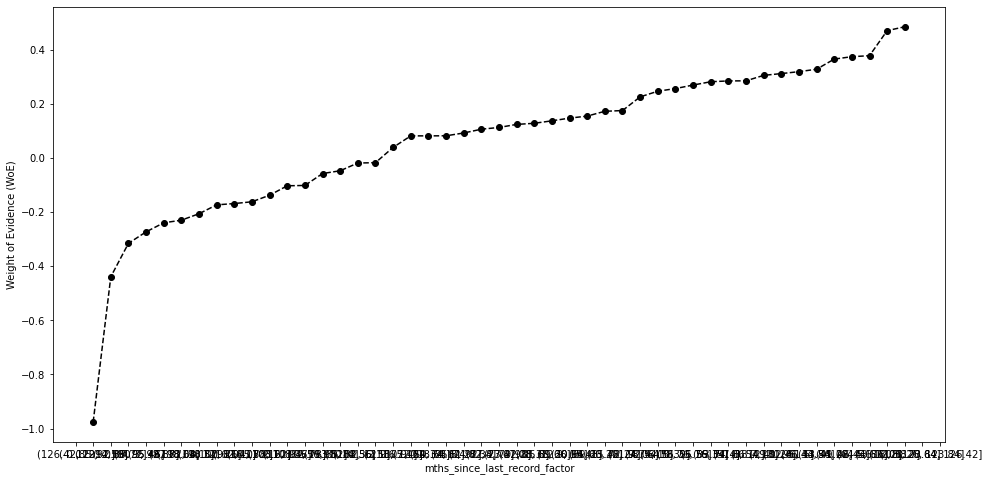

In [220]:
plot_WoE(last_rec)

In [221]:
X['mths_since_last_record:Missing'] = np.where(X['mths_since_last_record'].isnull(), 1, 0)
X['mths_since_last_record:0-2'] = np.where(X['mths_since_last_record'].isin(range(0,3)), 1, 0)
X['mths_since_last_record:3-20'] = np.where(X['mths_since_last_record'].isin(range(3,21)), 1, 0)
X['mths_since_last_record:21-31'] = np.where(X['mths_since_last_record'].isin(range(21,31)), 1, 0)
X['mths_since_last_record:32-80'] = np.where(X['mths_since_last_record'].isin(range(32,80)), 1, 0)
X['mths_since_last_record:81-86'] = np.where(X['mths_since_last_record'].isin(range(81,86)), 1, 0)
X['mths_since_last_record:>=86'] = np.where(X['mths_since_last_record'].isin(range(86,int(X['mths_since_last_record'].max()))), 1, 0)

### Total Account

In [222]:
X['total_acc_factor'] = pd.cut(X['total_acc'], 50)

total_acc = q_WoE(X, 'total_acc_factor', y)
total_acc

,total_acc_factor,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,"(-0.156, 3.12]",584,0.803082,0.001252,469.0,115.0,0.001129,0.002256,-0.692173,NaN,NaN,inf
1,"(96.72, 99.84]",7,0.857143,0.000015,6.0,1.0,0.000014,0.000020,-0.306085,0.054061,0.386089,inf
2,"(3.12, 6.24]",7503,0.861922,0.016091,6467.0,1036.0,0.015571,0.020326,-0.266499,0.004779,0.039586,inf
3,"(6.24, 9.36]",18762,0.872881,0.040237,16377.0,2385.0,0.039433,0.046794,-0.171165,0.010959,0.095334,inf
4,"(78.0, 81.12]",65,0.876923,0.000139,57.0,8.0,0.000137,0.000157,-0.134234,0.004042,0.036931,inf
5,"(9.36, 12.48]",31457,0.879995,0.067463,27682.0,3775.0,0.066653,0.074066,-0.105462,0.003072,0.028772,inf
6,"(12.48, 15.6]",41940,0.882666,0.089945,37019.0,4921.0,0.089134,0.096551,-0.079925,0.002671,0.025538,inf
7,"(18.72, 21.84]",50869,0.887712,0.109094,45157.0,5712.0,0.108729,0.112070,-0.030268,0.005046,0.049657,inf
8,"(15.6, 18.72]",48554,0.887857,0.104129,43109.0,5445.0,0.103798,0.106832,-0.028810,0.000145,0.001458,inf
9,"(93.6, 96.72]",9,0.888889,0.000019,8.0,1.0,0.000019,0.000020,-0.018403,0.001032,0.010408,inf


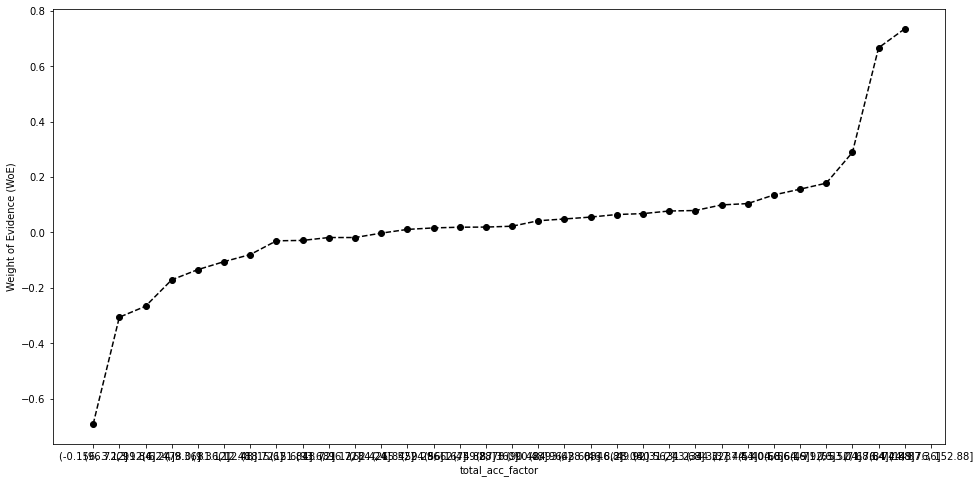

In [223]:
plot_WoE(total_acc)

In [224]:
# Creating 'total account' dummy variables
X['total_acc:<=27'] = np.where(X['total_acc_factor'].isin(range(0,28)), 1, 0)
X['total_acc:28-51'] = np.where(X['total_acc_factor'].isin(range(28,51)), 1, 0)
X['total_acc:>=52'] = np.where(X['total_acc_factor'].isin(range(52, int(X['total_acc'].max()))), 1, 0)

### Delinq 2 Years

In [225]:
delinq = q_WoE(X, 'delinq_2yrs', y)
delinq

,delinq_2yrs,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,21.0,2,0.500000,0.000004,1.0,1.0,0.000002,0.000020,-2.097844,NaN,NaN,inf
1,17.0,3,0.666667,0.000006,2.0,1.0,0.000005,0.000020,-1.404697,0.166667,0.693147,inf
2,12.0,38,0.710526,0.000081,27.0,11.0,0.000065,0.000216,-1.199903,0.043860,0.204794,inf
3,18.0,6,0.833333,0.000013,5.0,1.0,0.000012,0.000020,-0.488406,0.122807,0.711496,inf
4,13.0,25,0.840000,0.000054,21.0,4.0,0.000051,0.000078,-0.439616,0.006667,0.048790,inf
5,15.0,7,0.857143,0.000015,6.0,1.0,0.000014,0.000020,-0.306085,0.017143,0.133531,inf
6,10.0,65,0.861538,0.000139,56.0,9.0,0.000135,0.000177,-0.269717,0.004396,0.036368,inf
7,7.0,346,0.872832,0.000742,302.0,44.0,0.000727,0.000863,-0.171607,0.011294,0.098110,inf
8,14.0,8,0.875000,0.000017,7.0,1.0,0.000017,0.000020,-0.151934,0.002168,0.019673,inf
9,3.0,5684,0.885292,0.012190,5032.0,652.0,0.012116,0.012792,-0.054316,0.010292,0.097618,inf


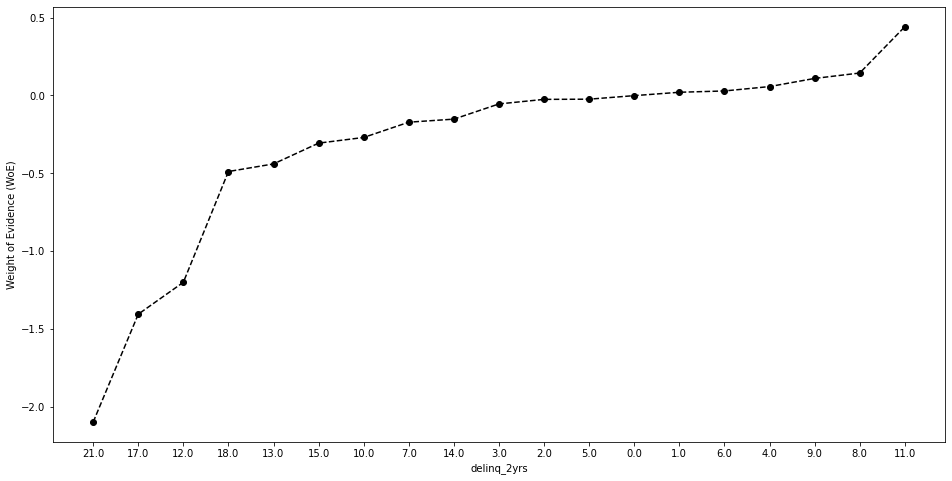

In [226]:
plot_WoE(delinq)

In [227]:
X['delinq_2yrs:0'] = np.where(X['delinq_2yrs'].isin(range(0)), 1, 0)
X['delinq_2yrs:1-3'] = np.where(X['delinq_2yrs'].isin(range(1,3)), 1, 0)
X['delinq_2yrs:>=4'] = np.where(X['delinq_2yrs'].isin(range(4,int(X['delinq_2yrs'].max()))), 1, 0)

### Inq (last 6 months)

In [228]:
inq = q_WoE(X, 'inq_last_6mths', y)
inq = inq[(inq['WoE'] != float('inf')) & (inq['WoE'] != float('-inf'))]
inq

C:\Users\tprofetto\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
4,14.0,6,0.166667,0.000013,1.0,5.0,0.000002,0.000098,-3.707282,0.166667,inf,inf
5,15.0,9,0.444444,0.000019,4.0,5.0,0.000010,0.000098,-2.320988,0.277778,1.386294,inf
6,18.0,4,0.500000,0.000009,2.0,2.0,0.000005,0.000039,-2.097844,0.055556,0.223144,inf
7,17.0,2,0.500000,0.000004,1.0,1.0,0.000002,0.000020,-2.097844,0.000000,0.000000,inf
8,12.0,15,0.600000,0.000032,9.0,6.0,0.000022,0.000118,-1.692379,0.100000,0.405465,inf
9,8.0,122,0.622951,0.000262,76.0,46.0,0.000183,0.000903,-1.595752,0.022951,0.096627,inf
10,9.0,50,0.640000,0.000107,32.0,18.0,0.000077,0.000353,-1.522480,0.017049,0.073272,inf
11,7.0,195,0.651282,0.000418,127.0,68.0,0.000306,0.001334,-1.473165,0.011282,0.049315,inf
12,13.0,6,0.666667,0.000013,4.0,2.0,0.000010,0.000039,-1.404697,0.015385,0.068468,inf
13,6.0,1188,0.783670,0.002548,931.0,257.0,0.002242,0.005042,-0.810661,0.117003,0.594036,inf


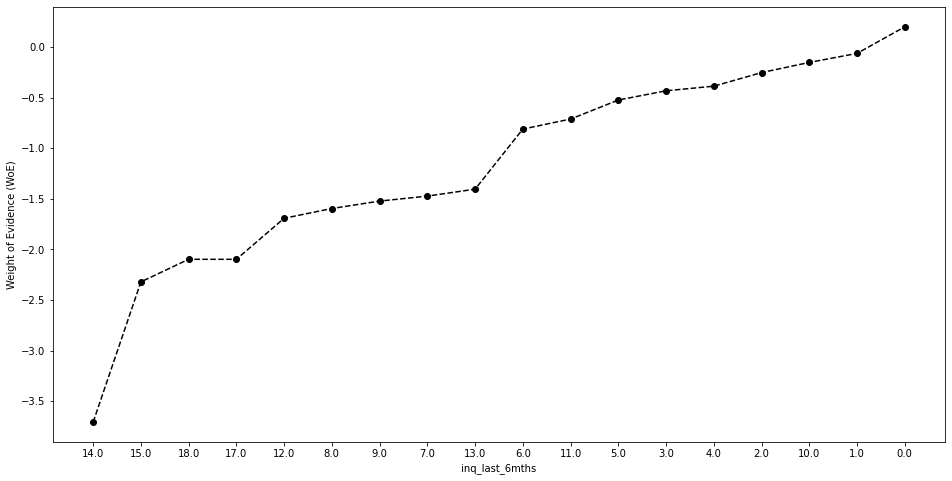

In [229]:
plot_WoE(inq)

In [230]:
X['inq_last_6mths:0'] = np.where((X['inq_last_6mths'] == 0), 1, 0)
X['inq_last_6mths:1-2'] = np.where((X['inq_last_6mths'] >= 1) & (X['inq_last_6mths'] <= 2), 1, 0)
X['inq_last_6mths:3-6'] = np.where((X['inq_last_6mths'] >= 3) & (X['inq_last_6mths'] <= 6), 1, 0)
X['inq_last_6mths:>6'] = np.where((X['inq_last_6mths'] > 6), 1, 0)

### Opened Account

In [231]:
X['open_acc_factor'] = pd.cut(X['open_acc'], 50)
open_acc = q_WoE(X, 'open_acc_factor', y)
open_acc

C:\Users\tprofetto\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,open_acc_factor,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,"(75.6, 77.28]",2,0.000000,0.000004,0.0,2.0,0.000000,0.000039,-inf,NaN,NaN,inf
1,"(35.28, 36.96]",126,0.849206,0.000270,107.0,19.0,0.000258,0.000373,-0.369454,0.849206,inf,inf
2,"(-0.084, 1.68]",178,0.859551,0.000382,153.0,25.0,0.000368,0.000491,-0.286282,0.010344,8.317224e-02,inf
3,"(1.68, 3.36]",7290,0.863237,0.015634,6293.0,997.0,0.015152,0.019561,-0.255402,0.003687,3.088032e-02,inf
4,"(36.96, 38.64]",178,0.882022,0.000382,157.0,21.0,0.000378,0.000412,-0.086121,0.018785,1.692810e-01,inf
5,"(10.08, 11.76]",39112,0.887605,0.083880,34716.0,4396.0,0.083589,0.086250,-0.031338,0.005582,5.478227e-02,inf
6,"(8.4, 10.08]",86531,0.889034,0.185575,76929.0,9602.0,0.185230,0.188393,-0.016933,0.001429,1.440587e-02,inf
7,"(23.52, 25.2]",4385,0.889852,0.009404,3902.0,483.0,0.009395,0.009477,-0.008616,0.000818,8.316359e-03,inf
8,"(28.56, 30.24]",1108,0.889892,0.002376,986.0,122.0,0.002374,0.002394,-0.008209,0.000040,4.074423e-04,inf
9,"(6.72, 8.4]",79495,0.891087,0.170486,70837.0,8658.0,0.170561,0.169871,0.004054,0.001196,1.226240e-02,inf


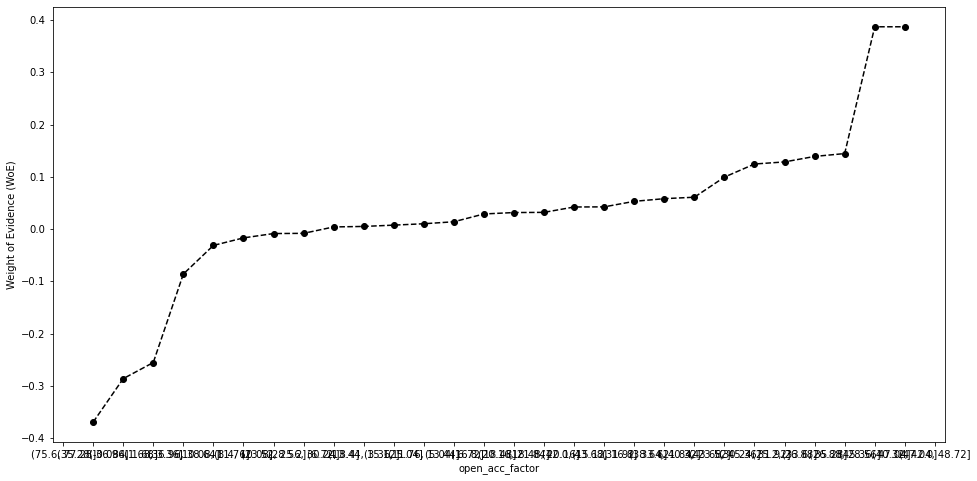

In [232]:
plot_WoE(open_acc)

In [233]:
X['open_acc:0'] = np.where(X['open_acc_factor'].isin(range(0)), 1, 0)
X['open_acc:1-3'] = np.where(X['open_acc_factor'].isin(range(1,3)), 1, 0)
X['open_acc:4-12'] = np.where(X['open_acc_factor'].isin(range(4,12)), 1, 0)
X['open_acc:13-17'] = np.where(X['open_acc_factor'].isin(range(13,17)), 1, 0)
X['open_acc:18-22'] = np.where(X['open_acc_factor'].isin(range(18,22)), 1, 0)
X['open_acc:23-25'] = np.where(X['open_acc_factor'].isin(range(23,25)), 1, 0)
X['open_acc:26-30'] = np.where(X['open_acc_factor'].isin(range(26,30)), 1, 0)
X['open_acc:>=31'] = np.where(X['open_acc_factor'].isin(range(31, int(X['open_acc'].max()))), 1, 0)

### Public Record

In [236]:
public = q_WoE(X, 'pub_rec', y)
public = public[(public['WoE'] != float('inf')) & (public['WoE'] != float('-inf'))]
public

,pub_rec,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,9.0,16,0.812500,0.000034,13.0,3.0,0.000031,0.000059,-0.631507,NaN,NaN,inf
1,0.0,404922,0.889789,0.868400,360295.0,44627.0,0.867518,0.875589,-0.009260,0.077289,0.622247,inf
2,1.0,53051,0.894969,0.113774,47479.0,5572.0,0.114320,0.109323,0.044689,0.005180,0.053949,inf
3,2.0,5624,0.903450,0.012061,5081.0,543.0,0.012234,0.010654,0.138310,0.008481,0.093621,inf
4,5.0,276,0.909420,0.000592,251.0,25.0,0.000604,0.000491,0.208733,0.005971,0.070423,inf
5,4.0,520,0.909615,0.001115,473.0,47.0,0.001139,0.000922,0.211104,0.000195,0.002371,inf
6,3.0,1611,0.916201,0.003455,1476.0,135.0,0.003554,0.002649,0.293972,0.006586,0.082868,inf
7,7.0,62,0.919355,0.000133,57.0,5.0,0.000137,0.000098,0.335769,0.003154,0.041797,inf
8,6.0,136,0.926471,0.000292,126.0,10.0,0.000303,0.000196,0.435853,0.007116,0.100083,inf
9,8.0,29,0.965517,0.000062,28.0,1.0,0.000067,0.000020,1.234360,0.039047,0.798508,inf


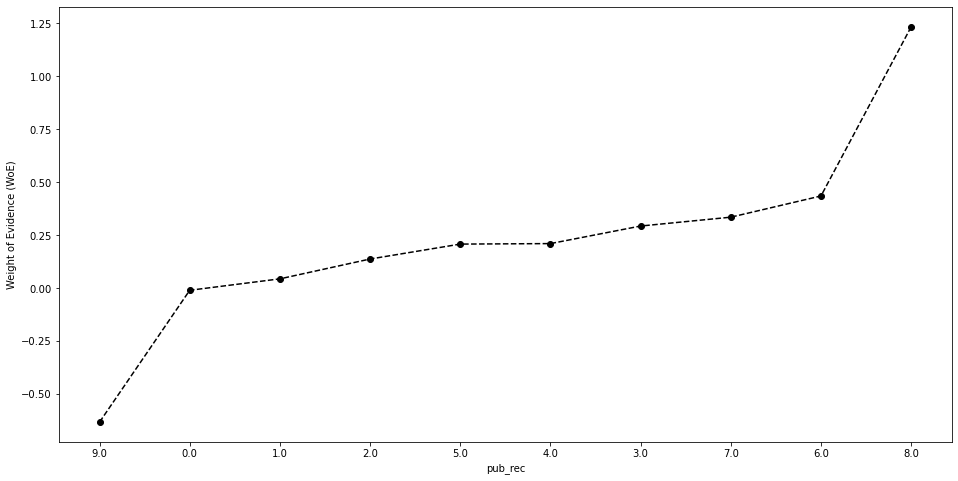

In [237]:
plot_WoE(public)

In [238]:
X['pub_rec:0-2'] = np.where(X['pub_rec'].isin(range(0,3)), 1, 0)
X['pub_rec:3-4'] = np.where(X['pub_rec'].isin(range(3,5)), 1, 0)
X['pub_rec:>=5'] = np.where(X['pub_rec'].isin(range(5,int(X['pub_rec'].max()))), 1, 0)

### Account Now

In [239]:
acc_now = q_WoE(X, 'acc_now_delinq', y)
acc_now

,acc_now_delinq,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,5.0,2,0.500000,0.000004,1.0,1.0,0.000002,0.000020,-2.097844,NaN,NaN,inf
1,3.0,11,0.818182,0.000024,9.0,2.0,0.000022,0.000039,-0.593767,0.318182,1.504077,inf
2,0.0,464553,0.890684,0.996286,413770.0,50783.0,0.996275,0.996370,-0.000095,0.072502,0.593671,inf
3,1.0,1623,0.893407,0.003481,1450.0,173.0,0.003491,0.003394,0.028183,0.002723,0.028279,inf
4,2.0,92,0.902174,0.000197,83.0,9.0,0.000200,0.000177,0.123772,0.008767,0.095589,inf
5,4.0,4,1.000000,0.000009,4.0,0.0,0.000010,0.000000,inf,0.097826,inf,inf


In [240]:
X['acc_now_delinq:0'] = np.where(X['acc_now_delinq'].isin(range(0)), 1, 0)
X['acc_now_delinq:>=1'] = np.where(X['acc_now_delinq'].isin(range(1, int(X['acc_now_delinq'].max()))), 1, 0)

### Months since Earliest Credit Line

In [241]:
X['mths_since_earliest_cr_line_factor'] = pd.cut(X['mths_since_earliest_cr_line'], 50)
X['mths_since_earliest_cr_line_factor']

earliest = q_WoE(X, 'mths_since_earliest_cr_line_factor', y)
earliest

,mths_since_earliest_cr_line_factor,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,"(93.92, 105.66]",3532,0.856172,0.007575,3024.0,508.0,0.007281,0.009967,-0.313990,NaN,NaN,0.01595
1,"(129.14, 140.88]",14517,0.864573,0.031133,12551.0,1966.0,0.030220,0.038573,-0.244045,0.008400,0.069945,0.01595
2,"(117.4, 129.14]",11531,0.866534,0.024730,9992.0,1539.0,0.024059,0.030195,-0.227192,0.001961,0.016853,0.01595
3,"(105.66, 117.4]",6360,0.867925,0.013640,5520.0,840.0,0.013291,0.016481,-0.215113,0.001391,0.012079,0.01595
4,"(140.88, 152.62]",16934,0.877347,0.036317,14857.0,2077.0,0.035773,0.040751,-0.130298,0.009423,0.084815,0.01595
5,"(152.62, 164.36]",20255,0.880326,0.043439,17831.0,2424.0,0.042933,0.047559,-0.102325,0.002978,0.027973,0.01595
6,"(575.26, 587.0]",1540,0.881169,0.003303,1357.0,183.0,0.003267,0.003590,-0.094299,0.000843,0.008026,0.01595
7,"(187.84, 199.58]",32674,0.884189,0.070073,28890.0,3784.0,0.069561,0.074243,-0.065130,0.003020,0.029168,0.01595
8,"(164.36, 176.1]",24248,0.884403,0.052003,21445.0,2803.0,0.051635,0.054995,-0.063043,0.000214,0.002087,0.01595
9,"(199.58, 211.32]",35552,0.885407,0.076245,31478.0,4074.0,0.075793,0.079933,-0.053181,0.001004,0.009862,0.01595


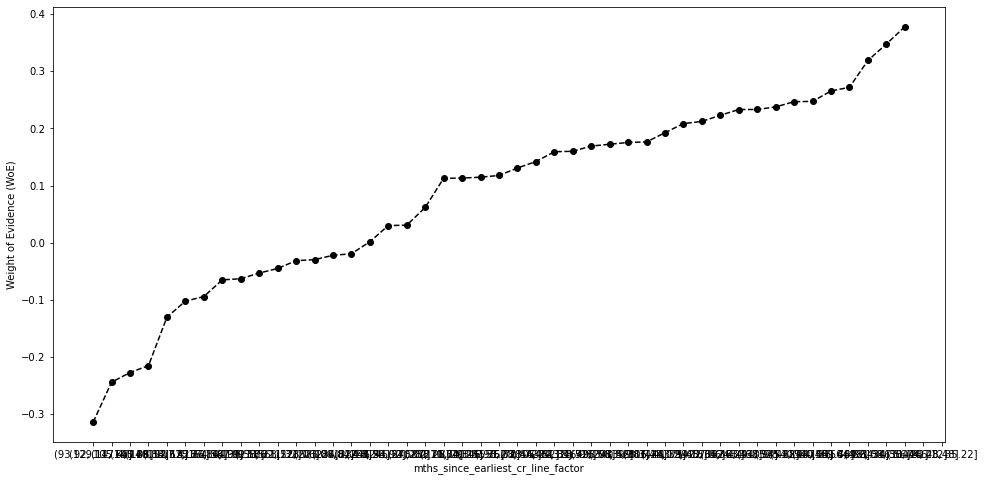

In [242]:
plot_WoE(earliest)

In [243]:
X['mths_since_earliest_cr_line:<140'] = np.where(X['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
X['mths_since_earliest_cr_line:141-164'] = np.where(X['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
X['mths_since_earliest_cr_line:165-247'] = np.where(X['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
X['mths_since_earliest_cr_line:248-270'] = np.where(X['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
X['mths_since_earliest_cr_line:271-352'] = np.where(X['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
X['mths_since_earliest_cr_line:>352'] = np.where(X['mths_since_earliest_cr_line'].isin(range(353, int(X['mths_since_earliest_cr_line'].max()))), 1, 0)

### Months since Last Deliquent

In [244]:
m_delinq = X[pd.notnull(X['mths_since_last_delinq'])]
m_delinq['mths_since_last_delinq_factor'] = pd.cut(m_delinq['mths_since_last_delinq'], 50)
m_delinq = q_WoE(m_delinq, 'mths_since_last_delinq_factor', y[m_delinq.index])
m_delinq

C:\Users\tprofetto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mths_since_last_delinq_factor,total,prop_good,%_total,good,bad,%_good,%_bad,WoE,diff_%good,diff_WoE,IV
0,"(150.4, 154.16]",2,0.500000,0.000009,1.0,1.0,0.000005,0.000043,-2.113109,NaN,NaN,inf
1,"(146.64, 150.4]",3,0.666667,0.000014,2.0,1.0,0.000010,0.000043,-1.419961,0.166667,0.693147,inf
2,"(109.04, 112.8]",3,0.666667,0.000014,2.0,1.0,0.000010,0.000043,-1.419961,0.000000,0.000000,inf
3,"(131.6, 135.36]",8,0.750000,0.000037,6.0,2.0,0.000031,0.000086,-1.014496,0.083333,0.405465,inf
4,"(94.0, 97.76]",25,0.760000,0.000116,19.0,6.0,0.000099,0.000258,-0.960429,0.010000,0.054067,inf
5,"(82.72, 86.48]",118,0.796610,0.000546,94.0,24.0,0.000488,0.001031,-0.747868,0.036610,0.212561,inf
6,"(105.28, 109.04]",11,0.818182,0.000051,9.0,2.0,0.000047,0.000086,-0.609031,0.021572,0.138836,inf
7,"(-0.188, 3.76]",6625,0.870943,0.030681,5770.0,855.0,0.029951,0.036720,-0.203783,0.052762,0.405248,inf
8,"(112.8, 116.56]",8,0.875000,0.000037,7.0,1.0,0.000036,0.000043,-0.167198,0.004057,0.036584,inf
9,"(78.96, 82.72]",4460,0.884978,0.020654,3947.0,513.0,0.020488,0.022032,-0.072673,0.009978,0.094525,inf


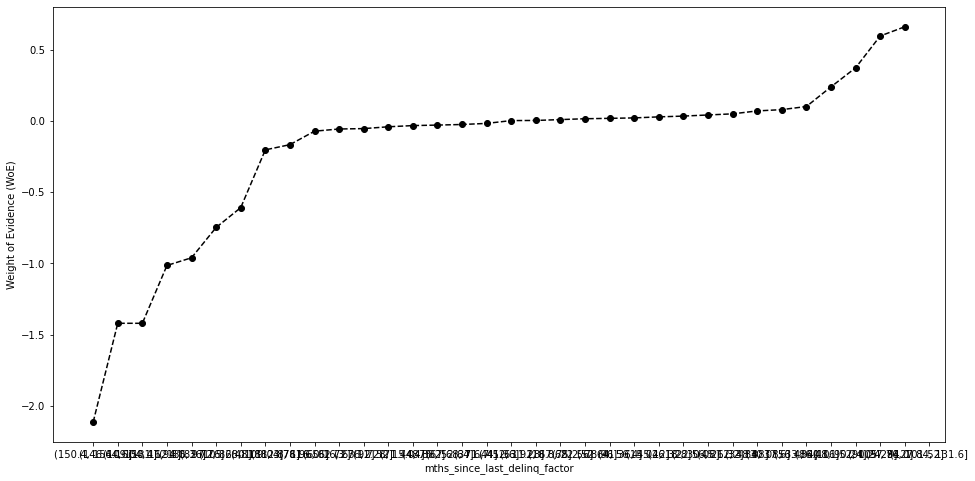

In [245]:
plot_WoE(m_delinq)

In [246]:
X['mths_since_last_delinq:Missing'] = np.where((X['mths_since_last_delinq'].isnull()), 1, 0)
X['mths_since_last_delinq:0-3'] = np.where((X['mths_since_last_delinq'] >= 0) & (X['mths_since_last_delinq'] <= 3), 1, 0)
X['mths_since_last_delinq:4-30'] = np.where((X['mths_since_last_delinq'] >= 4) & (X['mths_since_last_delinq'] <= 30), 1, 0)
X['mths_since_last_delinq:31-56'] = np.where((X['mths_since_last_delinq'] >= 31) & (X['mths_since_last_delinq'] <= 56), 1, 0)
X['mths_since_last_delinq:>=57'] = np.where((X['mths_since_last_delinq'] >= 57), 1, 0)

### Total Revenue History

In [247]:
X['total_rev_hi_lim:<=5K'] = np.where((X['total_rev_hi_lim'] <= 5000), 1, 0)
X['total_rev_hi_lim:5K-10K'] = np.where((X['total_rev_hi_lim'] > 5000) & (X['total_rev_hi_lim'] <= 10000), 1, 0)
X['total_rev_hi_lim:10K-20K'] = np.where((X['total_rev_hi_lim'] > 10000) & (X['total_rev_hi_lim'] <= 20000), 1, 0)
X['total_rev_hi_lim:20K-30K'] = np.where((X['total_rev_hi_lim'] > 20000) & (X['total_rev_hi_lim'] <= 30000), 1, 0)
X['total_rev_hi_lim:30K-40K'] = np.where((X['total_rev_hi_lim'] > 30000) & (X['total_rev_hi_lim'] <= 40000), 1, 0)
X['total_rev_hi_lim:40K-55K'] = np.where((X['total_rev_hi_lim'] > 40000) & (X['total_rev_hi_lim'] <= 55000), 1, 0)
X['total_rev_hi_lim:55K-95K'] = np.where((X['total_rev_hi_lim'] > 55000) & (X['total_rev_hi_lim'] <= 95000), 1, 0)
X['total_rev_hi_lim:>95K'] = np.where((X['total_rev_hi_lim'] > 95000), 1, 0)

## Exporting Preprocessed Dataframe to CSV format

In [248]:
df_preprocessed = pd.concat([X, y], axis=1)
df_preprocessed.to_csv('preprocessed.csv')